THINGS TO DO:
* ( x ) Tfidf consider both ngram = 1 and ngram = 2
* ( _ ) Lemmatize/Stem
* ( _ ) Spell check
* ( _ ) Identify stopwords and incorporate
* ( _ ) Ensemble of Logistic and Linear SVC and check scores


In [19]:
import pandas as pd

import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


import sklearn.metrics as metrics

In [20]:
def print_scores(y_actual, y_pred, average='None', classes_=None, print_definitions=True):
    '''
    Precision talks about how precise/accurate your model is out of those predicted positive, 
    how many of them are actual positive.Precision is a good measure to determine, when the 
    costs of False Positive is high. For instance, email spam detection.
    
    Recall actually calculates how many of the Actual Positives our model capture through 
    labeling it as Positive (True Positive). Applying the same understanding, we know that 
    Recall shall be the model metric we use to select our best model when there is a high cost 
    associated with False Negative. For instance, in fraud detection or sick patient detection.
    
    F1 Score is needed when you want to seek a balance between Precision and Recall. Right…so what 
    is the difference between F1 Score and Accuracy then? We have previously seen that accuracy 
    can be largely contributed by a large number of True Negatives which in most business 
    circumstances, we do not focus on much whereas False Negative and False Positive usually has 
    business costs (tangible & intangible) thus F1 Score might be a better measure to use if we 
    need to seek a balance between Precision and Recall AND there is an uneven class distribution 
    (large number of Actual Negatives).

    https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9
    '''
    print("-----------------------------------------------------------------------------")
    if(classes_ is not None):
        print("                                 CLASSES")
        print("                 -----------------------------------------")
        for i, class_ in enumerate(classes_):
            print("  Class [{}] : {}".format(i, class_))
        print("")
            
    
    print("                            CONFUSION MATRIX")
    print("                 -----------------------------------------")
    print(metrics.confusion_matrix(y_actual, y_pred))
    
    print("\n                                SCORES")
    print("                 -----------------------------------------")
    if(print_definitions):
        print("[ ACCURACY : Overall, how often is the classifier correct?")
        print("  WHEN TO USE:")
        print("    Distribution is EVEN across all classes")
        print("                   AND")
        print("    Cost of False Positive and False Negative are roughly the same")
        print("  FORMULA:")
        print("    Accuracy = (True Positive + True Negative) / Total Actual ]\n")
    print("===> **ACCURACY** = {}".format(metrics.accuracy_score(y_actual, y_pred)))

    if(print_definitions):
        print("\n                 -----------------------------------------")
        print("[ F1 SCORE: Seeks balance between Precision and Recall")
        print("  WHEN TO USE:")
        print("    Distribution is UNEVEN across classes (i.e. some classes have more Actual data than others)")
        print("                   AND")
        print("    Business is seeking to balance between Precision and Recall costs")
        print("  FORMULA:")
        print("    F1 = 2 * ((Precision * Recall) / (Precision + Recall)) ]\n")
    print("===> **F1 SCORE** = {}".format(metrics.f1_score(y_actual, y_pred, average=average)))

    if(print_definitions):
        print("\n                 -----------------------------------------")
        print("[ RECALL OR SENSITIVITY : When it's actually class 'X', how often does it predict as class 'X'?")
        print("  WHEN TO USE:")
        print("    Cost of False Negative is HIGH. Ex: Actual fraud predicted as 'Not fraud'!")
        print("  FORMULA:")
        print("    Recall = True Positive / Total Actual Positive ]\n")
    print("===> **RECALL** = {}".format(metrics.recall_score(y_actual, y_pred, average=average)))
    
    if(print_definitions):
        print("\n                 -----------------------------------------")
        print("[ PRECISION : When it predicts as class 'X', how often is it correct?")
        print("  WHEN TO USE:")
        print("    Cost of False Positive is HIGH. Ex: Non-spam email predicted as Spam!")
        print("  FORMULA:")
        print("    Precision = True Positive / Total Predicted Positive ]\n")
    print("===> **PRECISION** = {}".format(metrics.precision_score(y_actual, y_pred, average=average)))
    
    print("")
    print("                          CLASSIFICATION REPORT")
    print("                 -----------------------------------------")
    print(metrics.classification_report(y_actual, y_pred))

    print("-----------------------------------------------------------------------------")

In [21]:
DATA_FILE_PATH = r'C:\Madhan\Analytics\Machine_Learning_project_work\Great_Lakes_AIML\Capstone\consumer-court-models\src\Data\bag-of-words\Bag_Of_Words_Data_2019-02-01_00-47-05.csv'

In [22]:
bow_df = pd.read_csv(DATA_FILE_PATH, dtype='object')

In [23]:
bow_df.describe(include='all').transpose()

,count,unique,top,freq
index,532,532,419,1
HTML_File_Name,532,532,Delhi-CC_181_2018-2018-04-06.html,1
Complaint_Text,532,517,"Facts of the case, necessary for the adjudicat...",6
Verdict,532,3,Won,361


In [24]:
X = bow_df["Complaint_Text"].values
X.shape

(532,)

In [25]:
Y = bow_df["Verdict"].values
print("BEFORE ENCODING : {}".format(Y[0:10]))
print("")

le = preprocessing.LabelEncoder()
le.fit(Y)

print("ENCODED CLASSES : {}".format(le.classes_))
print("")

Y = le.transform(Y)
print("AFTER ENCODING  : {}".format(Y[0:10]))

BEFORE ENCODING : ['Dismissed' 'Dismissed' 'Dismissed' 'Dismissed' 'Won' 'Dismissed' 'Won'
 'Won' 'Won' 'Won']

ENCODED CLASSES : ['Dismissed' 'Partially Won' 'Won']

AFTER ENCODING  : [0 0 0 0 2 0 2 2 2 2]


In [26]:
X_train_txt, X_test_txt, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [27]:
unique, counts = np.unique(Y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 131]
 [  1   8]
 [  2 286]]


In [28]:
unique, counts = np.unique(Y_test, return_counts=True)

print(np.asarray((unique, counts)).T)

[[ 0 28]
 [ 1  4]
 [ 2 75]]


In [29]:
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3),min_df=50)
X_train = tfidf_vec.fit_transform(X_train_txt)
X_train.shape

(425, 431)

In [30]:
X_test = tfidf_vec.transform(X_test_txt)
X_test.shape

(107, 431)

In [31]:
lr = LogisticRegression(C=1e9) # Giving a really HIGH 'C' value to avoid overfitting
                               # See https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul

In [32]:
lr.fit(X_train, Y_train)
Y_pred_test_lr = lr.predict(X_test)

In [33]:
print_scores(Y_test, Y_pred_test_lr, average=None, classes_=le.classes_, print_definitions=False)

-----------------------------------------------------------------------------
                                 CLASSES
                 -----------------------------------------
  Class [0] : Dismissed
  Class [1] : Partially Won
  Class [2] : Won

                            CONFUSION MATRIX
                 -----------------------------------------
[[17  0 11]
 [ 0  0  4]
 [10  0 65]]

                                SCORES
                 -----------------------------------------
===> **ACCURACY** = 0.7663551401869159
===> **F1 SCORE** = [0.61818182 0.         0.83870968]
===> **RECALL** = [0.60714286 0.         0.86666667]
===> **PRECISION** = [0.62962963 0.         0.8125    ]

                          CLASSIFICATION REPORT
                 -----------------------------------------
             precision    recall  f1-score   support

          0       0.63      0.61      0.62        28
          1       0.00      0.00      0.00         4
          2       0.81      0.87      0.

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
models = [
    RandomForestClassifier(n_estimators=200, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

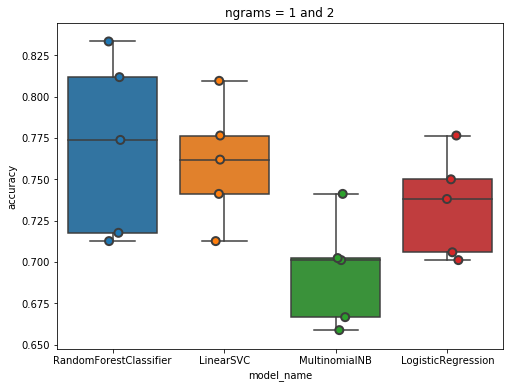

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df).set_title("ngrams = 1 and 2")
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [36]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.760344
LogisticRegression        0.734320
MultinomialNB             0.694039
RandomForestClassifier    0.769840
Name: accuracy, dtype: float64

In [37]:
model = LinearSVC()
model.fit(X_train, Y_train)
Y_pred_svc = model.predict(X_test)

print_scores(Y_test, Y_pred_svc, average=None, classes_=le.classes_, print_definitions=False)

-----------------------------------------------------------------------------
                                 CLASSES
                 -----------------------------------------
  Class [0] : Dismissed
  Class [1] : Partially Won
  Class [2] : Won

                            CONFUSION MATRIX
                 -----------------------------------------
[[17  0 11]
 [ 0  0  4]
 [ 5  0 70]]

                                SCORES
                 -----------------------------------------
===> **ACCURACY** = 0.8130841121495327
===> **F1 SCORE** = [0.68  0.    0.875]
===> **RECALL** = [0.60714286 0.         0.93333333]
===> **PRECISION** = [0.77272727 0.         0.82352941]

                          CLASSIFICATION REPORT
                 -----------------------------------------
             precision    recall  f1-score   support

          0       0.77      0.61      0.68        28
          1       0.00      0.00      0.00         4
          2       0.82      0.93      0.87        75

a

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
# LOGISTIC REGRESSION - TFIDF ngrams = 1
# -----------------------------------------------------------------------------
#                                  CLASSES
#                  -----------------------------------------
#   Class [0] : Dismissed
#   Class [1] : Partially Won
#   Class [2] : Won

#                             CONFUSION MATRIX
#                  -----------------------------------------
# [[18  0 10]
#  [ 0  0  4]
#  [ 6  0 69]]

#                                 SCORES
#                  -----------------------------------------
# ===> **ACCURACY** = 0.81308411215
# ===> **F1 SCORE** = [ 0.69230769  0.          0.87341772]
# ===> **RECALL** = [ 0.64285714  0.          0.92      ]
# ===> **PRECISION** = [ 0.75       0.         0.8313253]

#                           CLASSIFICATION REPORT
#                  -----------------------------------------
#               precision    recall  f1-score   support

#            0       0.75      0.64      0.69        28
#            1       0.00      0.00      0.00         4
#            2       0.83      0.92      0.87        75

#    micro avg       0.81      0.81      0.81       107
#    macro avg       0.53      0.52      0.52       107
# weighted avg       0.78      0.81      0.79       107

# -----------------------------------------------------------------------------

In [39]:
# LOGISTIC REGRESSION - TFIDF ngrams = 1 and 2
# -----------------------------------------------------------------------------
#                                  CLASSES
#                  -----------------------------------------
#   Class [0] : Dismissed
#   Class [1] : Partially Won
#   Class [2] : Won

#                             CONFUSION MATRIX
#                  -----------------------------------------
# [[17  0 11]
#  [ 0  0  4]
#  [ 3  0 72]]

#                                 SCORES
#                  -----------------------------------------
# ===> **ACCURACY** = 0.831775700935
# ===> **F1 SCORE** = [ 0.70833333  0.          0.88888889]
# ===> **RECALL** = [ 0.60714286  0.          0.96      ]
# ===> **PRECISION** = [ 0.85        0.          0.82758621]

#                           CLASSIFICATION REPORT
#                  -----------------------------------------
#               precision    recall  f1-score   support

#            0       0.85      0.61      0.71        28
#            1       0.00      0.00      0.00         4
#            2       0.83      0.96      0.89        75

#    micro avg       0.83      0.83      0.83       107
#    macro avg       0.56      0.52      0.53       107
# weighted avg       0.80      0.83      0.81       107

# -----------------------------------------------------------------------------

In [40]:
# LINEAR SVC - TFIDF ngrams = 1
# -----------------------------------------------------------------------------
#                                  CLASSES
#                  -----------------------------------------
#   Class [0] : Dismissed
#   Class [1] : Partially Won
#   Class [2] : Won

#                             CONFUSION MATRIX
#                  -----------------------------------------
# [[16  0 12]
#  [ 0  0  4]
#  [ 4  0 71]]

#                                 SCORES
#                  -----------------------------------------
# ===> **ACCURACY** = 0.81308411215
# ===> **F1 SCORE** = [ 0.66666667  0.          0.87654321]
# ===> **RECALL** = [ 0.57142857  0.          0.94666667]
# ===> **PRECISION** = [ 0.8         0.          0.81609195]

#                           CLASSIFICATION REPORT
#                  -----------------------------------------
#               precision    recall  f1-score   support

#            0       0.80      0.57      0.67        28
#            1       0.00      0.00      0.00         4
#            2       0.82      0.95      0.88        75

#    micro avg       0.81      0.81      0.81       107
#    macro avg       0.54      0.51      0.51       107
# weighted avg       0.78      0.81      0.79       107

# -----------------------------------------------------------------------------

In [41]:
# LINEAR SVC - TFIDF ngrams = 1 and 2
# -----------------------------------------------------------------------------
#                                  CLASSES
#                  -----------------------------------------
#   Class [0] : Dismissed
#   Class [1] : Partially Won
#   Class [2] : Won

#                             CONFUSION MATRIX
#                  -----------------------------------------
# [[14  0 14]
#  [ 0  0  4]
#  [ 2  0 73]]

#                                 SCORES
#                  -----------------------------------------
# ===> **ACCURACY** = 0.81308411215
# ===> **F1 SCORE** = [ 0.63636364  0.          0.87951807]
# ===> **RECALL** = [ 0.5         0.          0.97333333]
# ===> **PRECISION** = [ 0.875      0.         0.8021978]

#                           CLASSIFICATION REPORT
#                  -----------------------------------------
#               precision    recall  f1-score   support

#            0       0.88      0.50      0.64        28
#            1       0.00      0.00      0.00         4
#            2       0.80      0.97      0.88        75

#    micro avg       0.81      0.81      0.81       107
#    macro avg       0.56      0.49      0.51       107
# weighted avg       0.79      0.81      0.78       107

# -----------------------------------------------------------------------------

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [44]:
Y_pred_tree = classifier.predict(X_test)

In [45]:
print("DECISITION TREE ACCURACY:",metrics.accuracy_score(Y_test,Y_pred_tree))
print('DECISTION TREE CONFUSTION MATRIX:',pd.crosstab(Y_test,Y_pred_tree))
print('************************************************************************************')

DECISITION TREE ACCURACY: 0.7476635514018691
DECISTION TREE CONFUSTION MATRIX: col_0   0  1   2
row_0           
0      19  0   9
1       0  2   2
2      13  3  59
************************************************************************************


In [46]:
print_scores(Y_test, Y_pred_tree, average=None, classes_=le.classes_, print_definitions=False)

-----------------------------------------------------------------------------
                                 CLASSES
                 -----------------------------------------
  Class [0] : Dismissed
  Class [1] : Partially Won
  Class [2] : Won

                            CONFUSION MATRIX
                 -----------------------------------------
[[19  0  9]
 [ 0  2  2]
 [13  3 59]]

                                SCORES
                 -----------------------------------------
===> **ACCURACY** = 0.7476635514018691
===> **F1 SCORE** = [0.63333333 0.44444444 0.8137931 ]
===> **RECALL** = [0.67857143 0.5        0.78666667]
===> **PRECISION** = [0.59375    0.4        0.84285714]

                          CLASSIFICATION REPORT
                 -----------------------------------------
             precision    recall  f1-score   support

          0       0.59      0.68      0.63        28
          1       0.40      0.50      0.44         4
          2       0.84      0.79      0.

In [47]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(X_train, Y_train)
print(bgcl.oob_score_)

0.7458823529411764


In [48]:
bgcl = bgcl.fit(X_test, Y_test)
print(bgcl.oob_score_)

0.6915887850467289


In [77]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=classifier, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, Y_train)

In [78]:
y_pred_ada = abcl.predict(X_test)
abcl.score(X_test , Y_test)

0.7850467289719626

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, Y_train)

In [80]:
y_pred_gradboost = gbcl.predict(X_test)
gbcl.score(X_test , Y_test)

0.794392523364486

In [50]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

models = [
    RandomForestClassifier(n_estimators=200, random_state=0,criterion='entropy'),
    SVC(random_state=0,kernel='linear'),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100)
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
re = []
pre = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=CV,)
    recalls = cross_val_score(model, X_train, Y_train, scoring='recall', cv=CV)
    precisions = cross_val_score(model, X_train, Y_train, scoring='precision', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    for rec, recall in enumerate(recalls):
        re.append((model_name,rec,recall))
    for prec, preci in enumerate(precisions):
        pre.append((model_name,prec,preci))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [55]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

In [81]:
lrcl = LogisticRegression(random_state=1,C=1e9)
rfcl = RandomForestClassifier(n_estimators=200, random_state=0,criterion='entropy')
nbcl = MultinomialNB()
svc = SVC(random_state=0,kernel='linear')
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100)
bgcl = BaggingClassifier( n_estimators=10)  #the base_estimator can be null. The bagging classifer  will build it's own tree
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
#enclf = VotingClassifier(estimators = [('lor', lrcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl), ('dt', dt_model)], voting = 'hard')

stack = VotingClassifier(estimators = [('logistic', lrcl), ('SVC',svc),('nb', nbcl), ('randomforest', rfcl),('dt', dtree),('bagging', bgcl),('gradientbost', gbcl)], voting = 'hard')

In [83]:
for clf, label in zip([lrcl , rfcl, nbcl, stack, bgcl, dtree,svc,gbcl], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Stacking', 'Bagging', 'Decision Tree','GradientBoost']):
    scores = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.72 (+/- 0.10) [Logistic Regression]


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.78 (+/- 0.06) [RandomForest]
Accuracy: 0.71 (+/- 0.06) [NaiveBayes]


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\prepro

Accuracy: 0.78 (+/- 0.05) [Stacking]
Accuracy: 0.72 (+/- 0.08) [Bagging]


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.69 (+/- 0.06) [Decision Tree]


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.78 (+/- 0.05) [GradientBoost]


In [85]:
stack.fit(X_train,Y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)), ('...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [86]:
stack.score(X_train,Y_train)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [87]:
stack.score(X_test,Y_test)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.794392523364486

In [88]:
y_pred_stac = stack.predict(X_test)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
print("Staccking ACCURACY:",metrics.accuracy_score(Y_test,y_pred_stac))
print('Staccking CLASSIFIER CONFUSTION MATRIX:',pd.crosstab(Y_test,y_pred_stac))
print("===> **Staccking F1 SCORE",metrics.f1_score(Y_test, y_pred_stac,average=None))
print("===> **Staccking Recall SCORE",metrics.recall_score(Y_test, y_pred_stac,average=None))
print("===> **Staccking Precision SCORE",metrics.precision_score(Y_test, y_pred_stac,average=None))

Staccking ACCURACY: 0.794392523364486
Staccking CLASSIFIER CONFUSTION MATRIX: col_0   0   2
row_0        
0      15  13
1       0   4
2       5  70
===> **Staccking F1 SCORE [0.625      0.         0.86419753]
===> **Staccking Recall SCORE [0.53571429 0.         0.93333333]
===> **Staccking Precision SCORE [0.75      0.        0.8045977]


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
